<h1>Neural network classifier implemenetation</h1>
<h4>Creator: Aviv Lugasi</h4>

<br>
<h2>About the notebook</h2>
<p>
In this notebook we will implement a neural network classifier from scracth.<br>
Using only numpy, except for the softmax function of the last layer which for it<br>
Scipy built function was used for preventing overflow and underflow.<br>
Although the function was implemented in this notebook.<br>
After the implemention we will train the network to classify hand written digits<br>
and finally we will compare its performence to the built in Sklearn MLP model.<br>
</p>

<h2>About the data</h2>
<p>
The dataset is the MNIST large database of handwritten digits that is commonly used for training<br> various image processing systems.<br>
The dataset contains 42000 28X28 pixels grayscale labeled images of hand written digits.<br>
The dataset can be found on <a href="https://www.kaggle.com/competitions/digit-recognizer/data">Kaggle</a>
</p>

<h2>Libraries</h2>

In [1]:
# 1 -disable warnings
import warnings

warnings.filterwarnings('ignore')

# for working in with linear algebra, fourier transform,
# and matrices and other scientific computing.
import numpy as np

# data analysis and manipulation
import pandas as pd

#data pre- processing
from sklearn.preprocessing import StandardScaler

# data visualization
from matplotlib import pyplot as plt

# 8 - for log's calculations
import math
from math import e

#soft max function
from scipy.special import softmax

#NN sklearn model and gridSearchCV for comparing with my model results
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier

#model evaluation
from sklearn.metrics import accuracy_score

#train run time check
import time

# seed
RSEED = 10

#print float number with 6 digit after the decimal point
pd.set_option('display.float_format', lambda x: '%.6f' % x)

<h2>Pre processing</h2>

In [2]:
#read dataset
data = pd.read_csv("data.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# performing standardization
sc = StandardScaler()
label = data[['label']]
data.drop(['label'], axis=1, inplace=True)
X_scaled = sc.fit_transform(data)
X_scaled = pd.DataFrame(X_scaled)
data = pd.concat([label,X_scaled],axis=1)

In [4]:
data

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
2,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
41996,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
41997,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000
41998,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.034737,-0.025270,-0.018026,-0.011473,-0.009099,-0.006897,0.000000,0.000000,0.000000,0.000000


In [5]:
#transform to np array
data = np.array(data)

# shape
rows, cols = data.shape

#shuffeling the dataset before splitting to train and test
np.random.shuffle(data)

In [6]:
data

array([[9., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]])

In [7]:
#train test split(ratio of: 0.9:0.1)
test = data[0:4200]
train = data[4200:rows]

#X Y split
x_train = train[:,1:]
y_train = train[:,0]
x_test = test[:,1:]
y_test = test[:,0]
'''
We will transpose the matrix's of the x features for
further computing purposes
'''
#x transpose
x_train_T = x_train.T
x_test_T = x_test.T

<h2>The Neural Net</h2>
<h3>Theory</h3>

<h5>The Input layer</h5>
<p>
The input layer is consists of neurons as the number of X featurs.<br>
In our case 784 neurons(28X28 pixels).<br>
We can implement it as a matrix with $ \large 784 $ rows and $ \large M $ columuns, where $ \large M $ is the number<br>
of training samples and each element in the matrix(a neuron) hold a value which is<br>
the value of this row's number feature of the sample which its number is the column number<br>
in the matrix.<br>
lets call this matrix $ \large A_{784XM}$.<br>
</p>
<h5>Hidden Layer</h5>
<p>
This is where the magic happens, well if you call matrix multiplication, functions and derivatives<br>
magic. The most of the computions accours in those layers we can create as many hidden layes as we want,<br> where each layer has different number of neuorns which we defined as a hyper parameter.<br>
Each hidden layes consists of biases (numeric values) for each neuron and weights for each connection to neuron in the previous layer.<br>
The value that each neuron holds is the sum of the values of the neurons in the previous layer<br>
multiplyed by the weights i above then we add the bias to the result,<br>
but this is not the finale value, then we insert the result to what we call an activetion function<br> which do an unlinear transformation to the result, and this output will be the input<br>of the next hidden layer/output layer.<br>
the values of the biases and weights initilaizes rendomly, later on during the learning processe we will optimize those values with a process that called Gradient descent<br>, which I will explain later.<br>
The hidden layer can be implementd as matrix that represents the neuorons of the layer:<br>
Lets call it: $ \large A'_{NXM}$. where N is the number of neurons in the currnet layer<br>
and M is the number of samples.<br>
We can represents the biases also as a matrix with one columns and N rows<br>
lets call it: $ \large B_{NXM}$.<br>
We can represents the weights also as a matrix with $\large N$ rows and $\large N_{i-1} $
colums where $\large N_{i-1} $ is the number of neurons in the previous layer.<br>
lets call it : $\large W_{NXN_{i-1}} $
Lets call the input matrix of this layer $ \large A_{N_{i-1XM}} $ then <br>the overall compution
of this layer can be represents in the next equation:<br><br>
$\large  A'_{NXM} = f (W_{NXN_{i-1}} * A_{N_{i-1XM}} + B_{NXM}) $<br><br>
where $\large f $ is the layer activation function. Some examples of activation functions are:<br>
<h5>The Relu</h5><br><br>
$ \large
RELU(Z) = max(0, Z) , \dfrac{\partial}{\partial_Z} RELU(Z) = 1_{Z > 0} = 1, Z > 0 , 0, Z ≤ 0 $
1, Z > 0<br><br>
<h5>The tanH</h5><br><br>
$ \large
tanH(Z) = \dfrac{e^Z - e^{-Z}}{e^Z + e^{-Z}} , \dfrac{\partial}{\partial_Z} tanH(Z) = 1 - (tanH(Z))^2 $<br><br>
<h5>The sigmoid</h5><br><br>
$ \large
Sigmoid(Z) = \dfrac{1}{1 + e^{-Z}} , \dfrac{\partial}{\partial_Z} Sigmoid(Z) = Sigmoid(1 - Sigmoid(Z)) $<br><br>
</p>
<h5>Output Layer</h5>
<p>
Similar to the previous hidden layers this layer also contains weights and biases and uses the<br>
previous layer's output as input but our activation function is different.<br>
Insetd of using one of the above examples we will use the SoftMax function.<br>
the number of neurons in this layer is as the number of calssification classes, 10 in our case.<br>
Where the value that each neuron holds represent the possibility of the current sample to  belongs<br> to the classification class that the neuron represents.<br>
In order to shift the value of each neuron to range of 0-1 for the finale classification and<br>
for the use of the cost function, we use the softmax function which is:<br><br>
$ \large Z_i = \dfrac{e^{Z_i}}{\sum_{j=1}^{10}e^{Z_j}} $<br><br>
Where $ \large Z_i $ is the value of each neuron.<br><br>
</p>
<p>
We can visualize the network in the next image:<br>
<img src="neuralNet.png" alt="Neural Net">
</p>
<h5>Gradient descent</h5>
<p>
<img src="gradient_descent.png" alt="gradient descent"><br><br>
In this iterative process we will optimize the weights and biases of the network.<br>
We can describe the cost of our network by the values of the weights and biases in a function.<br>
By computing the derivatives of this function we can understand at which direction we need "to go"<br>
in order to reach to some local minima that will minimize the cost of our network<br>.
Lest represent it mathimitically:<br></p>
<p>
For the last layer:<br><br>
<img src="backpropagetion1.png"><br><br>
Where $ \large A^{|2|} $ is the output matrix of the last layer and y is the matrix that represents<br>
the one hot encoded values of each sample.<br>
$ \large A^{|1|T} $ is the output matrix of the previous layer.<br>
For hidden layer:<br>
The differences are:<br><br>
<img src="backpropagetion2.png"><br><br>
Where $ \large g^{|1|'} $ is the derivative of the activation function and $ \large Z^{|1|} $<br>
is the neurons values matrix before applying the activation function.<br>
The Weights and Biases updating:<br><br>
<img src="update.png"><br><br>
Where $ \large \alpha $ is a hyperparameter which we call a learning rate, and its purpose,<br>
is to prevent from us to take to big steps when "moving to the minima" and ccidentally miss it.<br>
This process of updating the weights and biases(back propagation) is applying after each run of our whole traning data trough the network(forward propagation).<br>
We repeate it hundreds and thousands times, during the training process.
</p>

<h3>Input Layer</h3>

In [8]:
class InputLayer:

    def __init__(self, x_mat):
        self.features_num,_ = x_mat.shape
        self.mat = x_mat


<h3>Hidden Layer<h3>

In [9]:
class HiddenLayer:

    def __init__(self, num_of_neurons, activation_func, previous_num_of_neurons, data_mat):
        #activation function of the layer
        self.activate_func = activation_func

        #weights matrix of the layer
        self.weights = np.random.rand(num_of_neurons, previous_num_of_neurons)* np.sqrt(1 / previous_num_of_neurons)

        #biases column matrix of the layer
        self.biases = np.zeros((num_of_neurons, 1))

        #data mat of the previous layer
        self.mat = data_mat

        #data mat after the linear combination of the weights and biases
        self.linear_comb_mat = None
        #data mat after the activation function
        self.after_mat = None

    '''
    takes the weights matrix and multiply it with the data output matrix
    of the previous layer then add the biases column matrix
    and applying the chosen activation function on the result matrix
    the result is the data output matrix of the current layer
    '''
    def layer_output(self):
        activate = np.vectorize(self.activate_func)
        self.linear_comb_mat = self.weights.dot(self.mat) + self.biases
        return  activate(self.linear_comb_mat)

<h3>Output Layer</h3>

In [10]:
class OutputLayer:

    def __init__(self, size, previous_num_of_neurons, data_mat):
        #weights matrix of the layer
        self.weights = np.random.rand(size, previous_num_of_neurons)* np.sqrt(1 / previous_num_of_neurons)

        #biases column matrix of the layer
        self.biases = np.zeros((size, 1))

        #data mat of the previous layer
        self.mat = data_mat

        #data mat after the activation function
        self.after_mat = None

    '''
    applying soft max function on each node in the output layer for a given sample
    '''
    def softMax(self, x):
        return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)), axis=0)

    '''
    compute the prediction matrix
    '''
    def predictions(self):
        _,r = self.after_mat.shape
        predictions = np.empty(shape=(r,1), dtype=np.int8)
        for i in range(0,r):
            max = self.after_mat[0,i]
            index = 0
            for j in range(1,10):
                if self.after_mat[j,i] > max:
                    max = self.after_mat[j,i]
                    index = j
            predictions[i,0] = index
        return predictions

    '''
    takes the weights matrix and multiply it with the data output matrix
    of the previous layer then add the biases column matrix
    and applying the softMax activation function on the result matrix(A) for each sample(column)
    the result is the data output matrix of the current layer that present
    probability for each digit per sample
    '''
    def layer_output(self):
        A = self.weights.dot(self.mat) + self.biases
        return softmax(A,axis=0)

<h3>Neural Net</h3>

In [11]:
class NeuralNet:

    def __init__(self, x_mat, y_mat, activation_func, hidden_layers_size, learning_rate, num_of_epoch):
        #x_mat of the training data
        self.data = x_mat

        #one hot encoded transposed matrix of the label matrix
        self.labels = self.one_hot_labels(y_mat)

        #the activation function of the neural net
        self.func = self.activate(activation_func)

        #the derivative function of the neural net's activation function
        self.deriv_func = self.derivative(activation_func)

        #number of epochs
        self.epochs = num_of_epoch

        #initial learning rate
        self.l_rate = learning_rate

        #input layer
        self.input_layer = InputLayer(x_mat)

        #hidden layers
        self.hidden_layers = self.create_hidden_layers(hidden_layers_size)
        rows_output,_ = self.labels.shape
        rows_prev,_ = self.hidden_layers[len(self.hidden_layers) - 1].weights.shape
        #output layer
        self.output_layer = OutputLayer(rows_output, rows_prev, None)

    '''
    create the hidden layers of the network
    '''
    def create_hidden_layers(self, hidden_layers_size):
        layers = []
        previous = self.input_layer.features_num
        for i in range (0, len(hidden_layers_size)):
            layers.append(HiddenLayer(hidden_layers_size[i],self.func, previous, None))
            previous = hidden_layers_size[i]
        return layers

    '''
    forward propagation of one epoch
    '''
    def forward_propagation(self):
        self.hidden_layers[0].mat = self.input_layer.mat
        self.hidden_layers[0].after_mat = self.hidden_layers[0].layer_output()
        for layer in range(1,len(self.hidden_layers)):
            self.hidden_layers[layer].mat = self.hidden_layers[layer-1].after_mat
            self.hidden_layers[layer].after_mat = self.hidden_layers[layer].layer_output()

        self.output_layer.mat = self.hidden_layers[len(self.hidden_layers)-1].after_mat
        self.output_layer.after_mat = self.output_layer.layer_output()

    '''
    back propagation of one epoch
    '''
    def back_propagation(self):
        _,num_of_samples = self.data.shape
        #cost compute
        dz = 2*(self.output_layer.after_mat - self.labels)
        #last hidden layer
        dw = (1/num_of_samples)*dz.dot(self.output_layer.mat.T)
        db = (1/num_of_samples)*np.sum(dz,1)
        self.update_weights_biases(self.output_layer, dw, db)
        #for the rest of the hidden layer
        for i in range(len(self.hidden_layers)-1,-1,-1):
            if i == len(self.hidden_layers)-1:
                A = self.output_layer.weights.T
            else:
                A = self.hidden_layers[i+1].weights.T
            activate = np.vectorize(self.deriv_func)
            dz = A.dot(dz)*activate(self.hidden_layers[i].linear_comb_mat)
            #last hidden layer
            dw = (1/num_of_samples)*dz.dot(self.hidden_layers[i].mat.T)
            db = (1/num_of_samples)*np.sum(dz,1)
            self.update_weights_biases(self.hidden_layers[i], dw, db)

    '''
    optimizing the neural net by executing epochs of forward
    and back propagation
    '''
    def optimize_net(self):
        for e in range(0,self.epochs):
            self.forward_propagation()
            self.back_propagation()

    '''
    update the weights and biases matrices based on the derivatives
    and the learning rate
    '''
    def update_weights_biases(self, layer, dw, db):
        r,_ = layer.weights.shape
        layer.weights = layer.weights-self.l_rate*dw
        layer.biases = layer.biases-self.l_rate*np.reshape(db,(r,1))

    '''
    create the transposed one hot encoded matrix of the label matrix
    for cost function computing
    '''
    def one_hot_labels(self, mat):
        one_hot = np.zeros((mat.size, mat.max() + 1))
        one_hot[np.arange(mat.size), mat] = 1
        one_hot = one_hot.T
        return one_hot

    '''
    return the chosen activation function
    possible functions: sigmoid, tanH, Relu
    '''
    def activate(self, func_str):
        #if sigmoid
        if func_str == 'sigmoid':
            def sigmoid(n):
                return 1/(1+e**(-n))
            return sigmoid
        #if tanH
        elif func_str == 'tanH':
            def tanH(n):
                return (e**n - e**(-n))/(e**n + e**(-n))
            return tanH
        #defualt as relu
        else:
            def relu(n):
                return max(0.01*n,n)
            return relu

    '''
    return the chosen activation function's derivative
    '''
    def derivative(self, func_str):
        #if sigmoid
        if func_str == 'sigmoid':
            def der_sigmoid(n):
                return (e**-n)/((1+e**-n)**2)
            return der_sigmoid
        #if tanH
        elif func_str == 'tanH':
            def der_tanH(n):
                return 4/((e**n+e**(-n))**2)
            return der_tanH
        #defualt as relu
        else:
            def der_relu(n):
                if n > 0:
                    return 1
                return 0
            return der_relu

    '''
    predict the classes of a given input matrix
    '''
    def predict(self, x_test):
        self.input_layer.mat = x_test
        self.input_layer.features_num,_ = x_test.shape
        self.forward_propagation()
        return self.output_layer.predictions()

In [12]:
y_train = y_train.astype(np.int64)

In [13]:
nn = NeuralNet(x_train_T, y_train, "relu", [20], 0.1, 1000)

In [14]:
start = time.time()
nn.optimize_net()
end = time.time()
print("the learning time took ")
print(end - start)

the learning time took 
489.92103481292725


<h3>train accuracy<h3>

In [15]:
acc = round(accuracy_score(y_train, nn.output_layer.predictions()), 3)

In [16]:
acc

0.969

<h3>test accuracy</h3>

In [17]:
y_test = y_test.astype(np.int64)

<h3>Testing few samples</h3>

Prediction:  9
Label:  9


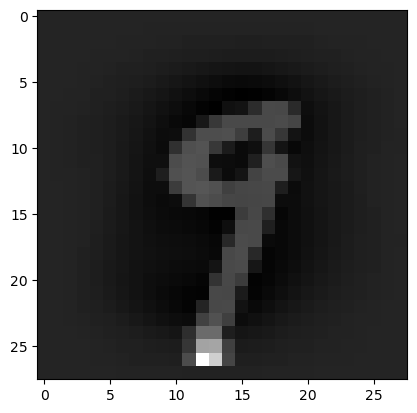

In [37]:
current_image = x_test_T[:, 0, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[0])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  1
Label:  1


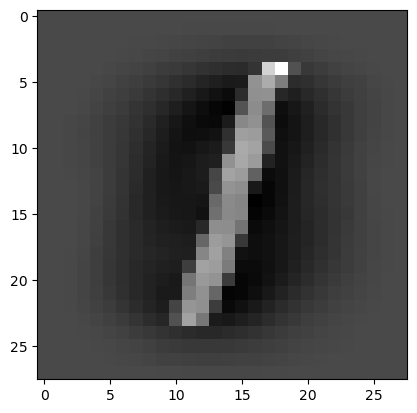

In [38]:
current_image = x_test_T[:, 1, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[1])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  0
Label:  0


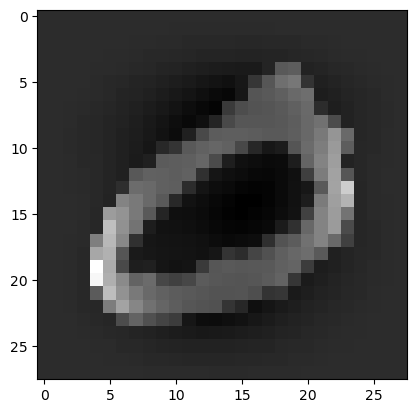

In [39]:
current_image = x_test_T[:, 2, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[2])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  8
Label:  8


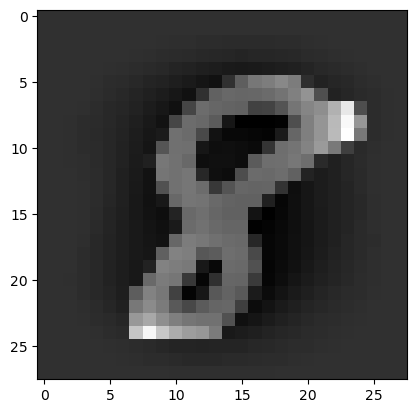

In [40]:
current_image = x_test_T[:, 3, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[3])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  6
Label:  6


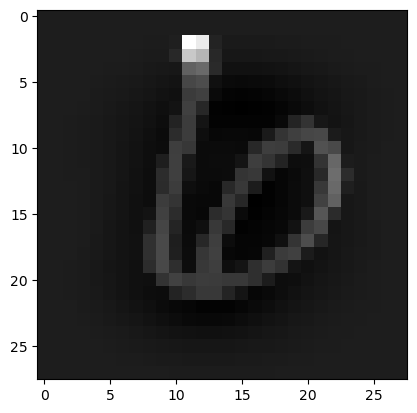

In [41]:
current_image = x_test_T[:, 4, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[4])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  2
Label:  2


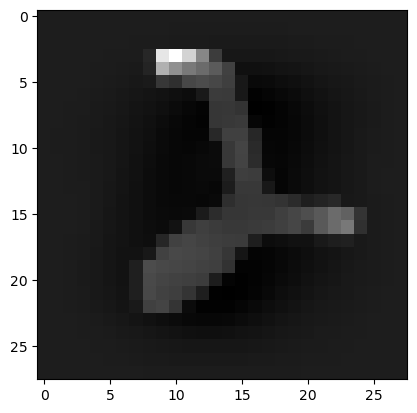

In [42]:
current_image = x_test_T[:, 5, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[5])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  8
Label:  8


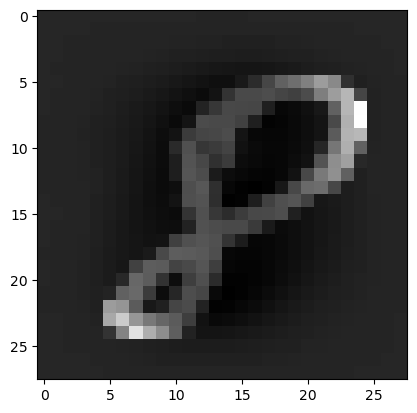

In [43]:
current_image = x_test_T[:, 6, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[6])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  9
Label:  9


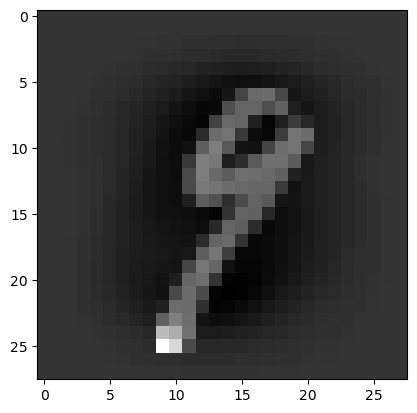

In [44]:
current_image = x_test_T[:, 7, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[7])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  1
Label:  1


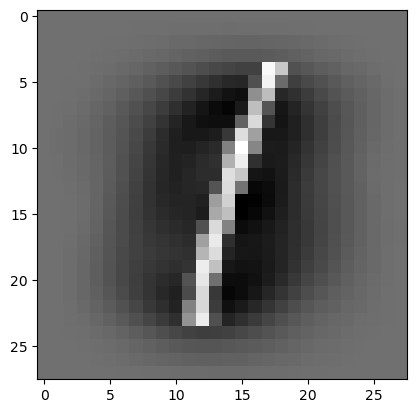

In [45]:
current_image = x_test_T[:, 8, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[8])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  2
Label:  2


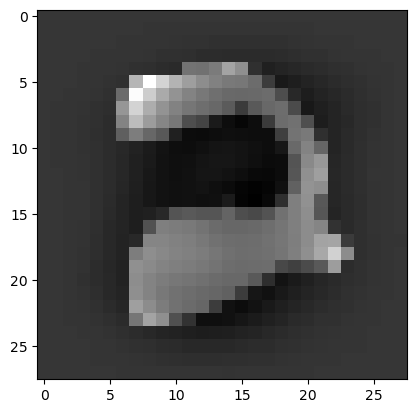

In [46]:
current_image = x_test_T[:, 9, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[9])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  7
Label:  7


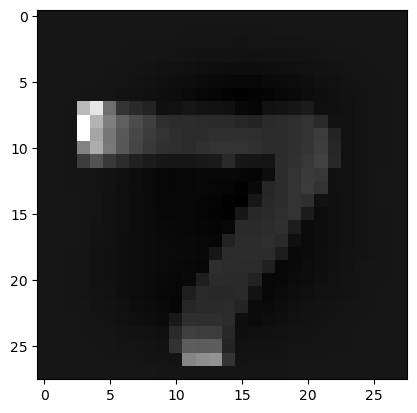

In [47]:
current_image = x_test_T[:, 10, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[10])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

Prediction:  2
Label:  2


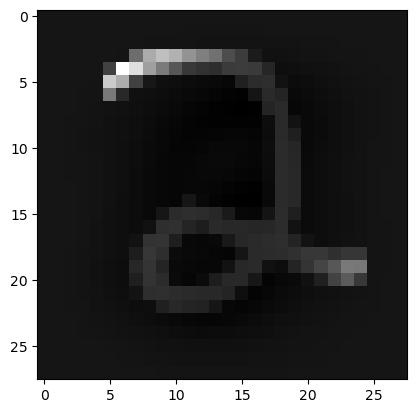

In [48]:
current_image = x_test_T[:, 11, None]
print("Prediction: ", nn.predict(current_image)[0,0])
print("Label: ", y_test[11])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

<h3>Full test data testing</h3>

In [49]:
acc = round(accuracy_score(y_test, nn.predict(x_test_T)), 3)
acc

0.949

In [31]:
#test real labels
y_test

array([9, 1, 0, ..., 8, 5, 9], dtype=int64)

In [32]:
#model predicted labels
nn.predict(x_test_T)

array([[9],
       [1],
       [0],
       ...,
       [8],
       [5],
       [9]], dtype=int8)

<h3>Comparing to sklearn model with same hyper parameters</h3>

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=[15], activation='relu', solver='adam', alpha=0.8,
                    learning_rate='constant', learning_rate_init=0.1, power_t=0.05, max_iter=1000)
#fit the network
mlp.fit(x_train, y_train)

MLPClassifier(alpha=0.8, hidden_layer_sizes=[15], learning_rate_init=0.1,
              max_iter=1000, power_t=0.05)

In [34]:
#test predict
predict_test = mlp.predict(x_test)
#calculating and printing test accuracy, Sensitivity and specificity
test_acc = round(accuracy_score(y_test, predict_test), 3)

In [35]:
test_acc

0.823

<h2>Summery</h2>

<p>
Overral we can see that we managed to optimize the network pretty well and,<br>
generalized from the training data.<br>
We mannaged to achive respectable accuracy of 95% on our testing data and<br>
even get better result then sklearn MLP model with the same hyper parameters.<br>
One drawback of the implemented model is that its train time is relatively long (489 seconds).<br>
We can optimize it by using different methods like: Mini Batch and Batch normalizition.
</p>